# Analyzing the rating given by viewers of a movie helps many people decide whether or not to watch that movie. So, for the Movie Rating Analysis task, you first need to have a dataset that contains data about the ratings given by each viewer.This contains two files:

# one file contains the data about the movie Id, title and the genre of the movie 
# and the other file contains the user id, movie id, ratings given by the user and the timestamp of the ratings

#### Importing required libraries

In [1]:
import numpy as np
import pandas as pd

#### First thing is to read the csv files 

In [2]:
movies=pd.read_csv('movies.dat',delimiter='::')
movies.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3856\964883835.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies=pd.read_csv('movies.dat',delimiter='::')


,0000008,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
0,10,La sortie des usines Lumière (1895),Documentary|Short
1,12,The Arrival of a Train (1896),Documentary|Short
2,25,The Oxford and Cambridge University Boat Race ...,NaN
3,91,Le manoir du diable (1896),Short|Horror
4,131,Une nuit terrible (1896),Short|Comedy|Horror


#### Add the columns names to the table

In [3]:
movies.columns = ["ID", "Title", "Genre"]
print(movies.head())

    ID                                              Title                Genre
0   10                La sortie des usines Lumière (1895)    Documentary|Short
1   12                      The Arrival of a Train (1896)    Documentary|Short
2   25  The Oxford and Cambridge University Boat Race ...                  NaN
3   91                         Le manoir du diable (1896)         Short|Horror
4  131                           Une nuit terrible (1896)  Short|Comedy|Horror


In [4]:
ratings=pd.read_csv('ratings.dat',delimiter='::')
ratings.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3856\2424788758.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings=pd.read_csv('ratings.dat',delimiter='::')


,1,0114508,8,1381006850
0,2,499549,9,1376753198
1,2,1305591,8,1376742507
2,2,1428538,1,1371307089
3,3,75314,1,1595468524
4,3,102926,9,1590148016


In [5]:
ratings.columns = ["User", "ID", "Ratings", "Timestamp"]
print(ratings.head())

   User       ID  Ratings   Timestamp
0     2   499549        9  1376753198
1     2  1305591        8  1376742507
2     2  1428538        1  1371307089
3     3    75314        1  1595468524
4     3   102926        9  1590148016


#### Concatinating the two files

In [6]:
data=movies.merge(ratings,how="left", on="ID")

In [7]:
data.head()

,ID,Title,Genre,User,Ratings,Timestamp
0,10,La sortie des usines Lumière (1895),Documentary|Short,70577,10,1412878553
1,12,The Arrival of a Train (1896),Documentary|Short,69535,10,1439248579
2,25,The Oxford and Cambridge University Boat Race ...,NaN,37628,8,1488189899
3,91,Le manoir du diable (1896),Short|Horror,5814,6,1385233195
4,91,Le manoir du diable (1896),Short|Horror,37239,5,1532347349


#### It counts the particular column values present in the table

In [8]:
rating = data["Ratings"].value_counts().sort_values(ascending=False)
rating

8     219311
7     203476
9     128749
6     118323
10    107284
5      68458
4      27779
3      15258
1      10663
2       9053
0        278
Name: Ratings, dtype: int64

#### Graphical visualization of 'rating'

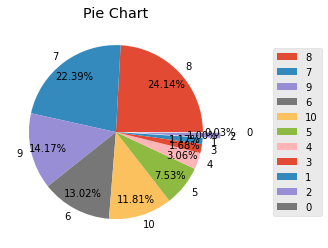

In [9]:
import matplotlib.pyplot as plt
indexes=rating.index
values=rating.values
plt.style.use('ggplot')
explode=[0,0,0,0,0,0,0,0,0,0.2,0.4]
plt.title("Pie Chart")
plt.pie(values,labels=indexes,autopct='%.2f%%',pctdistance=0.8,explode=explode)
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.savefig('piechart.png')
plt.show()

#### according to the pie chart above, most movies are rated 8 by users. From the above figure, it can be said that most of the movies are rated positively.

In [10]:
data.head()

,ID,Title,Genre,User,Ratings,Timestamp
0,10,La sortie des usines Lumière (1895),Documentary|Short,70577,10,1412878553
1,12,The Arrival of a Train (1896),Documentary|Short,69535,10,1439248579
2,25,The Oxford and Cambridge University Boat Race ...,NaN,37628,8,1488189899
3,91,Le manoir du diable (1896),Short|Horror,5814,6,1385233195
4,91,Le manoir du diable (1896),Short|Horror,37239,5,1532347349


#### Top 10 movies that got 10 ratings by viewers:

In [11]:
highest_rating_movies=data[data['Ratings'] == 10]['Title'].value_counts()
highest_rating_movies.head(10)

Joker (2019)                       1479
Interstellar (2014)                1386
1917 (2019)                         820
Avengers: Endgame (2019)            812
The Shawshank Redemption (1994)     707
Gravity (2013)                      653
The Wolf of Wall Street (2013)      581
Hacksaw Ridge (2016)                570
Avengers: Infinity War (2018)       535
La La Land (2016)                   510
Name: Title, dtype: int64